In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# Robust CSV loading: try common encodings and fall back to chardet
from pathlib import Path
import chardet
filepath = Path('mexico-real-estate-clean.csv')
encodings_to_try = ['utf-8', 'utf-8-sig', 'latin1', 'iso-8859-1', 'cp1252']
df = None
for enc in encodings_to_try:
    try:
        df = pd.read_csv(filepath, encoding=enc)
        print(f'Loaded with encoding: {enc}')
        break
    except Exception as e:
        # Keep going to next encoding
        print(f'Failed with encoding {enc}: {e}')
if df is None:
    # Fallback: detect encoding with chardet on a sample
    raw = filepath.read_bytes()[:100000]  # sample first 100KB
    guess = chardet.detect(raw)
    detected = guess.get('encoding')
    confidence = guess.get('confidence')
    print(f'Chardet detected: {detected} (confidence={confidence})')
    if detected:
        df = pd.read_csv(filepath, encoding=detected)
        print(f'Loaded with chardet-detected encoding: {detected}')
    else:
        raise UnicodeDecodeError('Unable to determine encoding; try opening the file in a text editor and re-saving with UTF-8')
# Quick preview
print(df.head())

Failed with encoding utf-8: 'utf-8' codec can't decode byte 0xe9 in position 11: invalid continuation byte
Failed with encoding utf-8-sig: 'utf-8' codec can't decode byte 0xe9 in position 64: invalid continuation byte
Loaded with encoding: latin1
  property_type             state        lat         lon  area_m2  price_usd
0         house  Estado de México  19.560181  -99.233528      150   67965.56
1         house        Nuevo León  25.688436 -100.198807      186   63223.78
2     apartment          Guerrero  16.767704  -99.764383       82   84298.37
3     apartment          Guerrero  16.829782  -99.911012      150   94308.80
4         house           Yucatán  21.052583  -89.538639      205  105191.37


In [4]:
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


In [5]:
df.shape

(1736, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


In [8]:
# Use existing columns for hover info: price_usd, area_m2, property_type
fig = px.scatter_mapbox(df, lat="lat", lon="lon", hover_name="price_usd", hover_data=["area_m2", "property_type"], color_discrete_sequence=["fuchsia"], zoom=10, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/var/folders/tr/jb5rcznx5cx_5ggz3m54mxsm0000gn/T/ipykernel_29234/315384894.py:2: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(df, lat="lat", lon="lon", hover_name="price_usd", hover_data=["area_m2", "property_type"], color_discrete_sequence=["fuchsia"], zoom=10, height=600)


In [9]:
df["state"].value_counts()

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala           

In [11]:
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


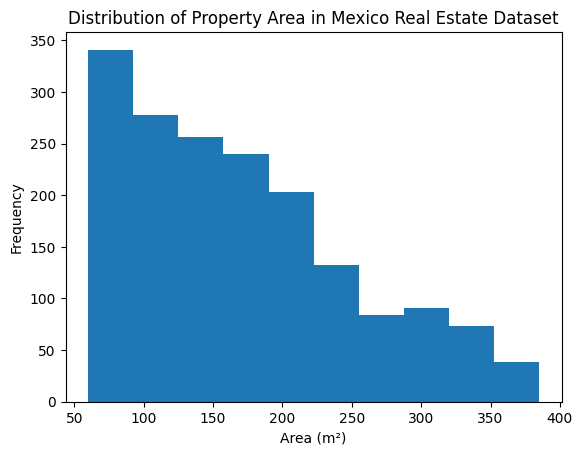

In [12]:
plt.hist(df["area_m2"])
plt.xlabel("Area (m²)")
plt.ylabel("Frequency")
plt.title("Distribution of Property Area in Mexico Real Estate Dataset")
plt.show()  

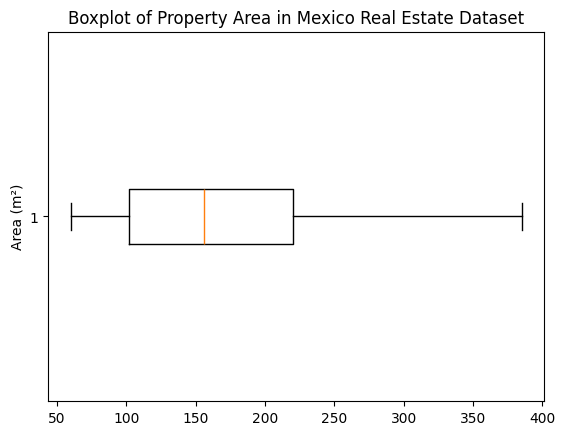

In [14]:
plt.boxplot(df["area_m2"], vert=False)
plt.ylabel("Area (m²)")
plt.title("Boxplot of Property Area in Mexico Real Estate Dataset")
plt.show()

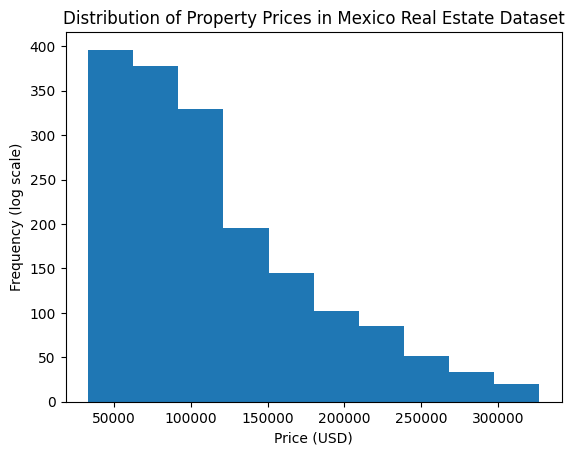

In [ ]:
plt.hist(df["price_usd"])
plt.xlabel("Price (USD)")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Property Prices in Mexico Real Estate Dataset")
plt.show()

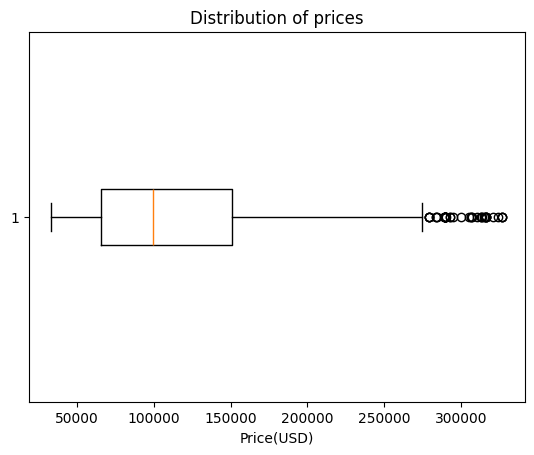

In [19]:
plt.boxplot(df["price_usd"], vert=False)
plt.xlabel("Price(USD)")
plt.title("Distribution of prices")
plt.show()
